# Project 5: Feature Matching 

This iPython notebook:  
(1) Loads and resizes images  
(2) Finds interest points in those images                 (you code this)  
(3) Describes each interest point with a local feature    (you code this)  
(4) Finds matching features                               (you code this)  
(5) Visualizes the matches  
(6) Evaluates the matches based on ground truth correspondences  

## Setup

In [1]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from student_feature_matching import match_features
from student_sift import get_features
from student_harris import get_interest_points
from IPython.core.debugger import set_trace
# Notre Dame
image1 = load_image('../data/Notre Dame/921919841_a30df938f2_o.jpg')
image2 = load_image('../data/Notre Dame/4191453057_c86028ce1f_o.jpg')
eval_file = '../data/Notre Dame/921919841_a30df938f2_o_to_4191453057_c86028ce1f_o.pkl'

# # # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
# image3 = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
# image4 = load_image('../data/Mount Rushmore/9318872612_a255c874fb_o.jpg')
# eval_file2 = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'

# # # Episcopal Gaudi -- This pair is relatively difficult
# image5 = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
# image6 = load_image('../data/Episcopal Gaudi/3743214471_1b5bbfda98_o.jpg')
# eval_file3 = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'

                    
scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image1_bw = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_bw = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

## Find distinctive points in each image (Szeliski 4.1.1)

For our get interest points, we combined our project 4 code to give us a better version of the harris detector. Specifically we improved our non-max supression by taking advantage of numpy to find the distances more effeciently. On the NotreDame image, it takes approx. 4-6 mins to detect points for both images.

100 corners in image 1, 100 corners in image 2


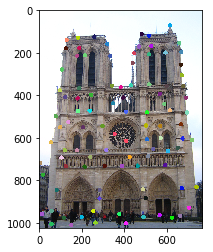

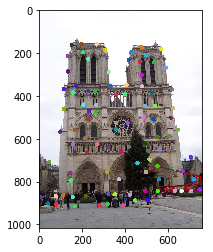

In [3]:
x1, y1 = get_interest_points(image1_bw, 100)
x2, y2 = get_interest_points(image2_bw, 100)
# x1, y1, x2, y2 = cheat_interest_points(eval_file, scale_factor)
# plt.figure(); plt.imshow(image1_bw)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)
plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

## Create feature vectors at each interest point (Szeliski 4.1.2)

AGGGGGGGHHHHHHHYHH. Sorry this was the most frustrating part for us, particularly with figuring out what was going on conceptually with the calulation of the feature vector. But after a couple days of reading papers, watching videos we thought we had it figured out so we moved onto feature detection, only to complete that and debug it for an entire day only to realize that our FV's were messed up.
So we went back in and created the 16x16 windows by grabing the patch directly from a range within the image rather than trying to do a for-loop to look at each value indidvidually.We blur the patch in order to get better values on the 4x4 windows.
Then we used our code from project 3 to find the gradient of the image. We are working in degrees so when we use the np.histogram function of 4x4 windows with 8 bins, the bins must got from -180 to 180, based on the way that the values get converted. 
We do that for each 16x16 window and get a list of feature vectors that we raise to the .8th power because we were told it would increase our accuracy and it did.

In [4]:
image1_features = get_features(image1_bw, x1, y1, feature_width, 1)
image2_features = get_features(image2_bw, x2, y2, feature_width, 1)
#print(image1_features)
#print(image2_features)

## Match features (Szeliski 4.1.3)

To match our features, for every feature, we calculate the cartesian distance for each feature vector and add it to a list with their corresponding indicies. Then we sort them according to their distance from smallest to greatest. We then retrieve the 2 nearest neighbors in order to determine whether the match is weak or strong and we discard the weak matches. To get to 21% accuracy we set the Threshold of the strength test(NNDR) to 1.17. This was decided by looking at the data we recived and estimating.

In [17]:
matches1, confidences1 = match_features(image1_features, image2_features, x1, y1, x2, y2)
print('{:d} matches from {:d} corners'.format(len(matches1), len(x1)))


[[ 0 27]
 [ 1 69]
 [ 2 27]
 [ 3 16]
 [ 4 11]
 [ 5 13]
 [ 6 12]
 [ 7 38]
 [ 8 21]
 [ 9 45]
 [10 21]
 [11 80]
 [12 98]
 [13 33]
 [14 11]
 [15 79]
 [16 10]
 [17 39]
 [18 20]
 [19 65]
 [20 43]
 [21 18]
 [22 69]
 [23 35]
 [24 80]
 [25 15]
 [26 53]
 [27 50]
 [28 43]
 [29 36]
 [30 29]
 [31 37]
 [32 43]
 [33 28]
 [34 45]
 [35 42]
 [36 26]
 [37 38]
 [38 37]
 [39 15]
 [40 97]
 [41 64]
 [42  1]
 [43 42]
 [44 33]
 [45 97]
 [46 43]
 [47 33]
 [48 91]
 [49 22]
 [50 20]
 [51 32]
 [52 62]
 [53 50]
 [54 13]
 [55 72]
 [56 10]
 [57 52]
 [58 86]
 [59 86]
 [60  5]
 [61 95]
 [62 52]
 [63 62]
 [64  2]
 [65  6]
 [66 53]
 [67 76]
 [68 67]
 [69 20]
 [70 21]
 [71 75]
 [72 16]
 [73 95]
 [74 53]
 [75 61]
 [76 62]
 [77 72]
 [78 35]
 [79 44]
 [80 75]
 [81 23]
 [82 72]
 [83 90]
 [84 21]
 [85 81]
 [86 21]
 [87 61]
 [88 82]
 [89 49]
 [90 28]
 [91 90]
 [92 52]
 [93 67]
 [94 67]
 [95 36]
 [96 22]
 [97 42]
 [98 84]
 [99 55]]
[0.98388898 0.92527909 0.93839591 0.95505654 0.95654617 0.93347358
 0.97434927 0.99293664 0.9290541

## Visualization

You might want to set 'num_pts_to_visualize' and 'num_pts_to_evaluate' to some constant (e.g. 100) once you start detecting hundreds of interest points, otherwise things might get too cluttered. You could also threshold based on confidence.  
  
There are two visualization functions below. You can comment out one of both of them if you prefer.

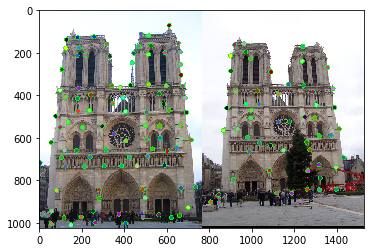

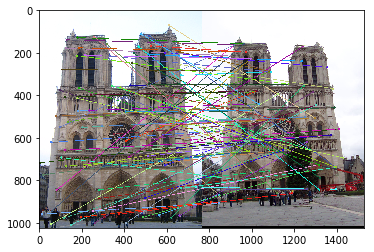

In [18]:
num_pts_to_visualize1 = len(matches1)



c1 = show_correspondence_circles(image1, image2,
                    x1[matches1[:num_pts_to_visualize1, 0]], y1[matches1[:num_pts_to_visualize1, 0]],
                    x2[matches1[:num_pts_to_visualize1, 1]], y2[matches1[:num_pts_to_visualize1, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles.jpg', dpi=1000)

c2 = show_correspondence_lines(image1, image2,
                    x1[matches1[:num_pts_to_visualize1, 0]], y1[matches1[:num_pts_to_visualize1, 0]],
                    x2[matches1[:num_pts_to_visualize1, 1]], y2[matches1[:num_pts_to_visualize1, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines.jpg', dpi=1000)

Comment out the function below if you are not testing on the Notre Dame, Episcopal Gaudi, and Mount Rushmore image pairs--this evaluation function will only work for those which have ground truth available.  
  
You can use `annotate_correspondences/collect_ground_truth_corr.py` to build the ground truth for other image pairs if you want, but it's very tedious. It would be a great service to the class for future years, though!

Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Correct
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Correct
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
You found 100/100 required matches
Accurac

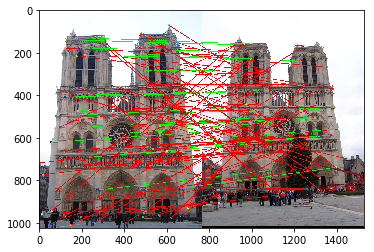

In [19]:
num_pts_to_evaluate1 = len(matches1)
#num_pts_to_evaluate1 = 100
_, ca = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches1[:num_pts_to_evaluate1, 0]], y1[matches1[:num_pts_to_evaluate1, 0]],
                        x2[matches1[:num_pts_to_evaluate1, 1]], y2[matches1[:num_pts_to_evaluate1, 1]])
plt.figure(); plt.imshow(ca)
plt.savefig('../results/eval.jpg', dpi=1000)

100 corners in image 5, 100 corners in image 6
[[ 0  1]
 [ 1  8]
 [ 2 18]
 [ 3 47]
 [ 4 15]
 [ 5 85]
 [ 6 10]
 [ 7 40]
 [ 8 74]
 [ 9 84]
 [10 74]
 [11 12]
 [12 14]
 [13 44]
 [14  8]
 [15 33]
 [16 28]
 [17 91]
 [18 74]
 [19 20]
 [20 84]
 [21 92]
 [22 97]
 [23 43]
 [24 36]
 [25 59]
 [26 52]
 [27 29]
 [28 63]
 [29 74]
 [30 63]
 [31 19]
 [32 10]
 [33 25]
 [34 74]
 [35 86]
 [36 27]
 [37 85]
 [38 97]
 [39 71]
 [40 81]
 [41 88]
 [42 35]
 [43 55]
 [44 26]
 [45 48]
 [46 95]
 [47 97]
 [48 77]
 [49 41]
 [50 44]
 [51  5]
 [52  3]
 [53 35]
 [54 15]
 [55 74]
 [56 87]
 [57 63]
 [58 82]
 [59 77]
 [60 54]
 [61  0]
 [62 34]
 [63 38]
 [64 17]
 [65 22]
 [66 19]
 [67 16]
 [68 83]
 [69 44]
 [70 87]
 [71 59]
 [72 97]
 [73 24]
 [74 53]
 [75 37]
 [76 70]
 [77 41]
 [78 25]
 [79  8]
 [80 25]
 [81 26]
 [82 29]
 [83 33]
 [84 22]
 [85 53]
 [86 66]
 [87 26]
 [88 92]
 [89 95]
 [90 20]
 [91 19]
 [92 26]
 [93 70]
 [94 74]
 [95 89]
 [96 16]
 [97 97]
 [98 50]
 [99 20]]
[0.95820992 0.97704801 0.97330787 0.96901051 0.97005

NameError: name 'num_pts_to_evaluate3' is not defined

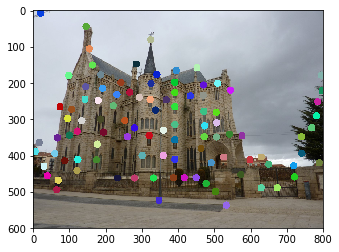

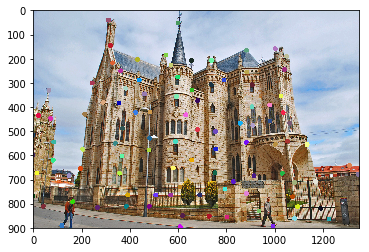

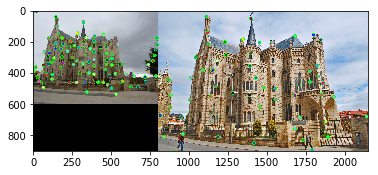

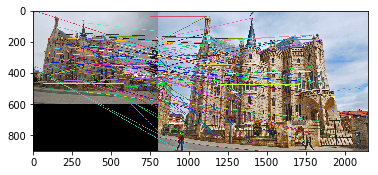

In [13]:
# # Episcopal Gaudi -- This pair is relatively difficult
image5 = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
image6 = load_image('../data/Episcopal Gaudi/3743214471_1b5bbfda98_o.jpg')
eval_file3 = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'
image5 = cv2.resize(image5, (0, 0), fx=scale_factor, fy=scale_factor)
image6 = cv2.resize(image6, (0, 0), fx=scale_factor, fy=scale_factor)
image5_bw = cv2.cvtColor(image5, cv2.COLOR_RGB2GRAY)
image6_bw = cv2.cvtColor(image6, cv2.COLOR_RGB2GRAY)
x5, y5 = get_interest_points(image5_bw, 100)
x6, y6 = get_interest_points(image6_bw, 100)
c5 = show_interest_points(image5, x5, y5)
c6 = show_interest_points(image6, x6, y6)
plt.figure(); plt.imshow(c5)
plt.figure(); plt.imshow(c6)
print('{:d} corners in image 5, {:d} corners in image 6'.format(len(x5), len(x6)))
image5_features = get_features(image5_bw, x5, y5, feature_width, 1)
image6_features = get_features(image6_bw, x6, y6, feature_width, 1)
matches3, confidences3 = match_features(image5_features, image6_features, x5, y5, x6, y6)
print('{:d} matches from {:d} corners'.format(len(matches3), len(x5)))
num_pts_to_visualize3 = len(matches3)
num_pts_to_evaluate3 = len(matches3)
c5 = show_correspondence_circles(image5, image6,
                    x5[matches3[:num_pts_to_visualize3, 0]], y5[matches3[:num_pts_to_visualize3, 0]],
                    x6[matches3[:num_pts_to_visualize3, 1]], y6[matches3[:num_pts_to_visualize3, 1]])
plt.figure(); plt.imshow(c5)
plt.savefig('../results/vis_circles.jpg', dpi=1000)
c6 = show_correspondence_lines(image5, image6,
                    x5[matches3[:num_pts_to_visualize3, 0]], y5[matches3[:num_pts_to_visualize3, 0]],
                    x6[matches3[:num_pts_to_visualize3, 1]], y6[matches3[:num_pts_to_visualize3, 1]])
plt.figure(); plt.imshow(c6)
plt.savefig('../results/vis_lines.jpg', dpi=1000)
_, cc = evaluate_correspondence(image5, image6, eval_file3, scale_factor,
                        x5[matches3[:num_pts_to_evaluate3, 0]], y5[matches3[:num_pts_to_evaluate3, 0]],
                        x6[matches3[:num_pts_to_evaluate3, 1]], y6[matches3[:num_pts_to_evaluate3, 1]])
plt.figure(); plt.imshow(cc)
plt.savefig('../results/eval3.jpg', dpi=1000)

In [ ]:
# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
image3 = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
image4 = load_image('../data/Mount Rushmore/9318872612_a255c874fb_o.jpg')
eval_file2 = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'
image3 = cv2.resize(image3, (0, 0), fx=scale_factor, fy=scale_factor)
image4 = cv2.resize(image4, (0, 0), fx=scale_factor, fy=scale_factor)
image3_bw = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
image4_bw = cv2.cvtColor(image4, cv2.COLOR_RGB2GRAY)
x3, y3 = get_interest_points(image3_bw, 100)
x4, y4 = get_interest_points(image4_bw, 100)
c3 = show_interest_points(image3, x3, y3)
c4 = show_interest_points(image4, x4, y4)
plt.figure(); plt.imshow(c3)
plt.figure(); plt.imshow(c4)
print('{:d} corners in image 3, {:d} corners in image 4'.format(len(x3), len(x4)))
image3_features = get_features(image3_bw, x3, y3, feature_width, 1)
image4_features = get_features(image4_bw, x4, y4, feature_width, 1)
matches2, confidences2 = match_features(image3_features, image4_features, x3, y3, x4, y4)
print('{:d} matches from {:d} corners'.format(len(matches2), len(x3)))
num_pts_to_visualize2 = len(matches2)
num_pts_to_evaluate2 = len(matches2)
c3 = show_correspondence_circles(image3, image4,
                    x3[matches2[:num_pts_to_visualize2, 0]], y3[matches2[:num_pts_to_visualize2, 0]],
                    x4[matches2[:num_pts_to_visualize2, 1]], y4[matches2[:num_pts_to_visualize2, 1]])
plt.figure(); plt.imshow(c3)
plt.savefig('../results/vis_circles.jpg', dpi=1000)

c4 = show_correspondence_lines(image3, image4,
                    x3[matches2[:num_pts_to_visualize2, 0]], y3[matches2[:num_pts_to_visualize2, 0]],
                    x4[matches2[:num_pts_to_visualize2, 1]], y4[matches2[:num_pts_to_visualize2, 1]])
plt.figure(); plt.imshow(c4)
plt.savefig('../results/vis_lines.jpg', dpi=1000)
_, cb = evaluate_correspondence(image3, image4, eval_file2, scale_factor,
                        x3[matches2[:num_pts_to_evaluate2, 0]], y3[matches2[:num_pts_to_evaluate2, 0]],
                        x4[matches2[:num_pts_to_evaluate2, 1]], y4[matches2[:num_pts_to_evaluate2, 1]])
plt.figure(); plt.imshow(cb)
plt.savefig('../results/eval2.jpg', dpi=1000)